### Importing Required Libraries

In [1]:
# Load libraries
import pandas as pd

### Diabetes dataset

In [2]:
# Pima Indians Diabetes Database
# Predict the onset of diabetes based on diagnostic measures
# https://www.kaggle.com/uciml/pima-indians-diabetes-database

# load dataset
pima = pd.read_csv("diabetes.csv")

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


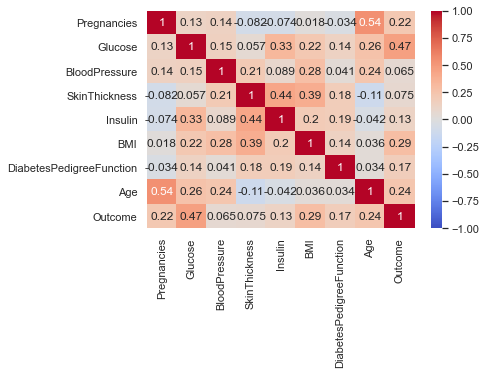

In [5]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = pima.corr()

sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

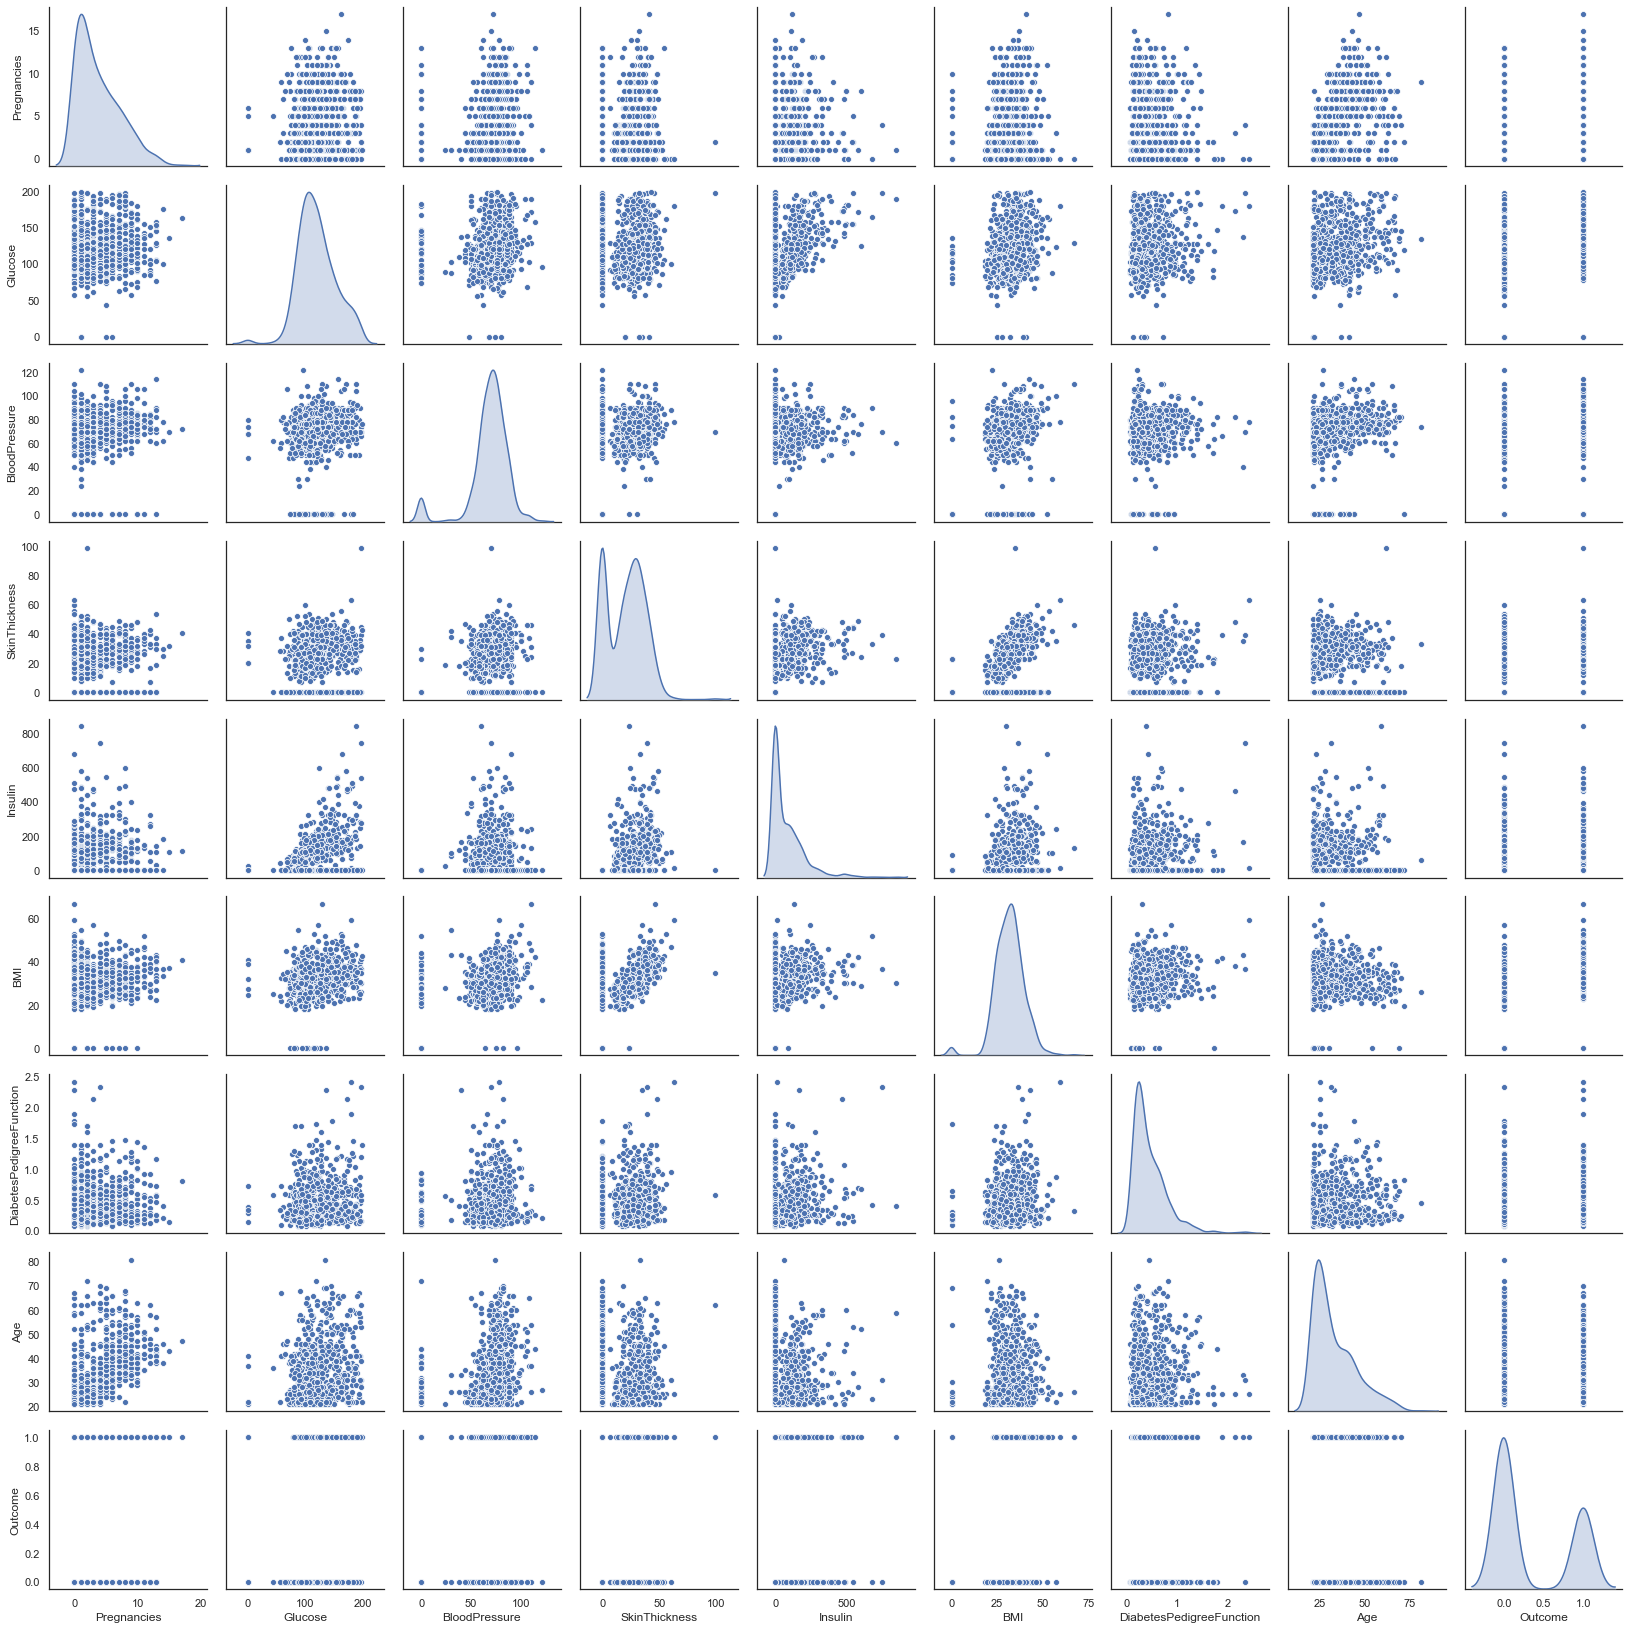

In [6]:
# https://python-graph-gallery.com/111-custom-correlogram/
import seaborn as sns
import matplotlib.pyplot as plt

df = pima
 
# Density
sns.pairplot(df, diag_kind="kde")
 
# Histogram
#sns.pairplot(df, diag_kind="hist")
 
# You can custom it as a density plot or histogram so see the related sections
#sns.pairplot(df, diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False) )



### Feature Selection

In [11]:
#split dataset in features and target variable
feature_cols = ['Insulin', 'BMI', 'Age','DiabetesPedigreeFunction','SkinThickness']
#feature_cols = ['Insulin', 'BMI', 'Age', 'SkinThickness']
X = pima[feature_cols] # Features (independent variables)
y = pima.Glucose # Target variable

### Building the Multiple Regression Model

In [12]:
import statsmodels.api as sm
#X = df_adv[['TV', 'Radio']] 
#y = df_adv['Sales']
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Glucose   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     45.16
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           7.06e-41
Time:                        10:36:12   Log-Likelihood:                -3650.6
No. Observations:                 768   AIC:                             7313.
Df Residuals:                     762   BIC:                             7341.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       68.6452      5.115     13.420      0.000      58.604      78.687
Insulin                      0.1003      0.010     10.147      0.000       0.081       0.120
BMI                          0.7876      0.141      5.576      0.000       0.510       1.065
Age                          0.6833      0.088      7.807      0.000       0.511       0.855
DiabetesPedigreeFunction     6.1855      3.158      1.959      0.051      -0.014      12.385
SkinThickness               -0.3206      0.077     -4.188      0.000      -0.471      -0.170
==============================================================================
Omnibus:                       23.996   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.407
Skew:                           0.122   Prob(JB):                     6.87e-12
Kurtosis:                       4.244   Cond. No.                         730.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Stock market example

In [100]:
#https://datatofish.com/statsmodels-linear-regression/

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 

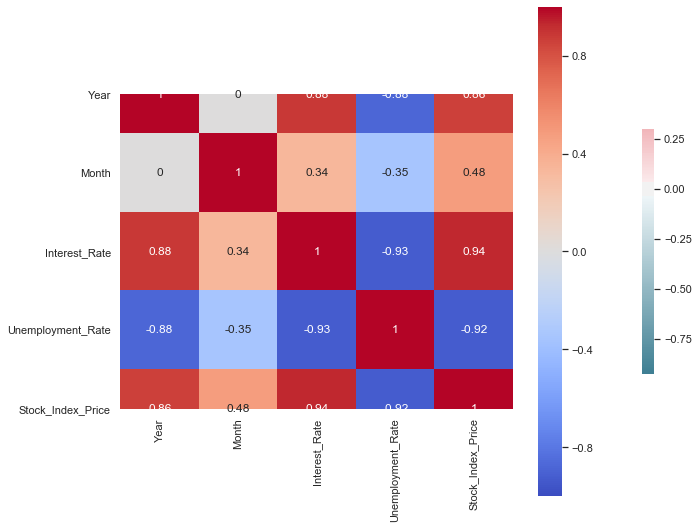

In [101]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

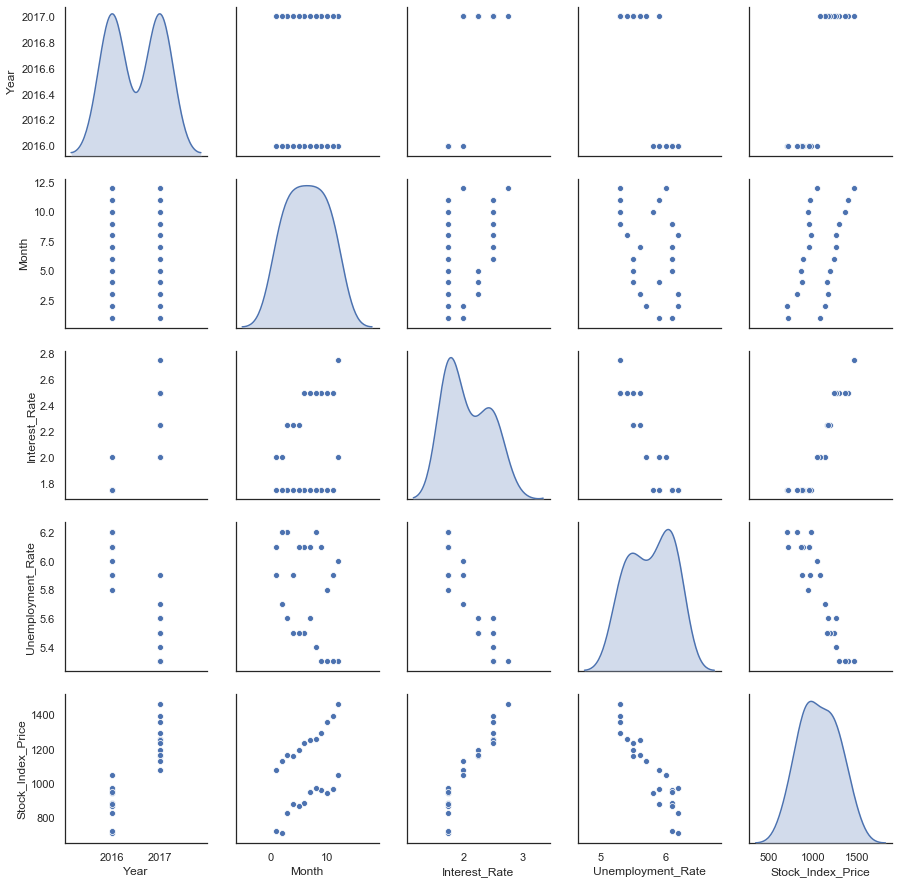

In [102]:
# Density
sns.pairplot(df, diag_kind="kde")

In [104]:
# Here we have 2 variables for the multiple linear regression. 
X = df[['Interest_Rate','Unemployment_Rate']] 
Y = df['Stock_Index_Price']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)



                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           4.04e-11
Time:                        09:17:20   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.24

### Practice

In [103]:
# Compare against models with a single predictor: 

# 1) Interest_Rate

# 2) Unemployment_Rate

### Concrete example

In [13]:
# https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength
# load dataset
concrete = pd.read_csv("concrete.csv")
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,Fine Aggregate,Age,ConcreteCompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


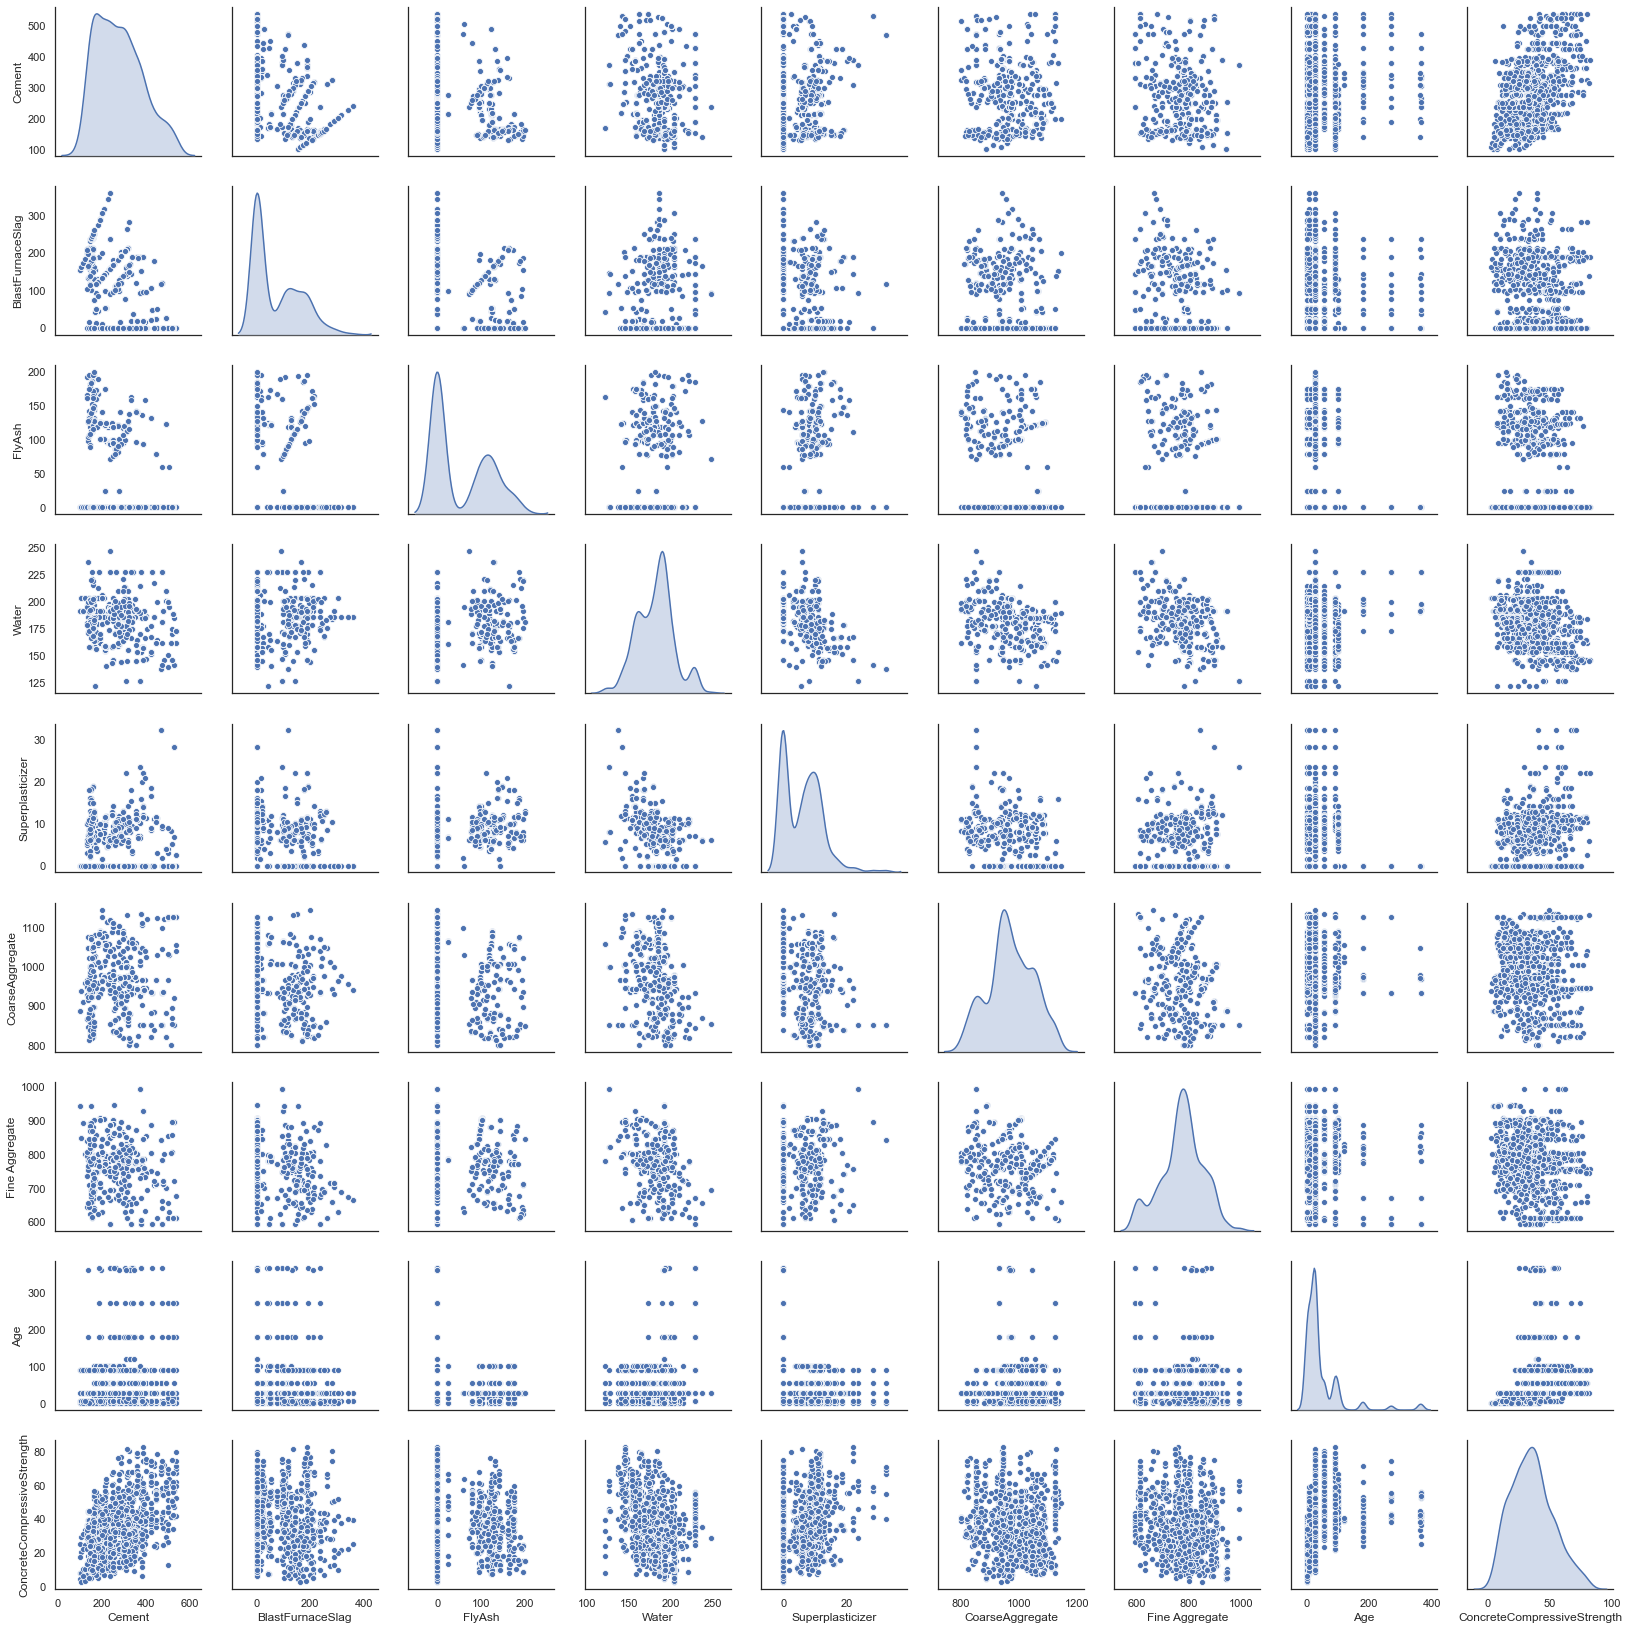

In [14]:
# Density
sns.pairplot(concrete, diag_kind="kde")

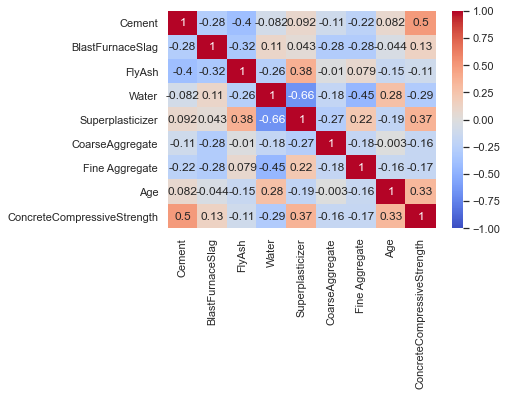

In [15]:
sns.heatmap(concrete.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [16]:
# Build a model for predicting ConcreteCompressiveStrength

X = concrete[['Cement','BlastFurnaceSlag','FlyAsh','Water','Superplasticizer','CoarseAggregate','Fine Aggregate','Age']] 
Y = concrete['ConcreteCompressiveStrength']

# Constant is not significant
X = sm.add_constant(X) 

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:     ConcreteCompressiveStrength   R-squared:                       0.616
Model:                                     OLS   Adj. R-squared:                  0.613
Method:                          Least Squares   F-statistic:                     204.3
Date:                         Tue, 01 Sep 2020   Prob (F-statistic):          6.29e-206
Time:                                 11:00:27   Log-Likelihood:                -3869.0
No. Observations:                         1030   AIC:                             7756.
Df Residuals:                             1021   BIC:                             7800.
Df Model:                                    8                                         
Covariance Type:                     nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [17]:
# Identify collinearity of every predictor 

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
for i in range(len(concrete.columns[:-1])):
    v = vif(np.matrix(concrete[:-1]),i)
    print("VIF for {}: {}".format(concrete.columns[i],round(v,2)))
    
# VIF > 10 indica alta multicolinearidad

VIF for Cement: 26.21
VIF for BlastFurnaceSlag: 4.44
VIF for FlyAsh: 4.56
VIF for Water: 92.58
VIF for Superplasticizer: 5.52
VIF for CoarseAggregate: 85.97
VIF for Fine Aggregate: 73.45
VIF for Age: 2.44


In [26]:
# Keep the intercept and iteratively remove correlated features until reach a valid model. 

X = concrete[['BlastFurnaceSlag','FlyAsh','Superplasticizer','Age']] 
Y = concrete['ConcreteCompressiveStrength']

# Constant is not significant
X = sm.add_constant(X) 

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

#Cond. no. arriba de 20 es preocupante...


                                 OLS Regression Results                                
Dep. Variable:     ConcreteCompressiveStrength   R-squared:                       0.354
Model:                                     OLS   Adj. R-squared:                  0.352
Method:                          Least Squares   F-statistic:                     140.7
Date:                         Tue, 01 Sep 2020   Prob (F-statistic):           7.33e-96
Time:                                 11:05:12   Log-Likelihood:                -4135.9
No. Observations:                         1030   AIC:                             8282.
Df Residuals:                             1025   BIC:                             8306.
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------